In [1]:
from simple_polygon import Simple_polygon
import osmnx as ox, matplotlib.pyplot as plt, numpy as np
ox.config(use_cache=True, log_console=True)
%matplotlib inline

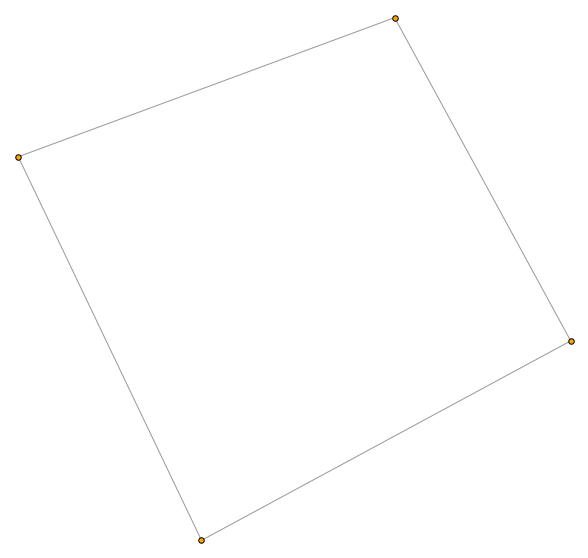

In [2]:
# get a street network and plot it with all edge intersections
point_A = (30.19689,120.17435)
point_B = (30.19728,120.17313)
G = ox.graph_from_bbox(north=point_B[0], south=point_A[0] , east=point_A[1], west=point_B[1],
                       network_type='drive')
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj, fig_height=10, node_color='orange', node_size=30, 
                        node_zorder=2, node_edgecolor='k')

In [3]:
nodes,edges = ox.save_load.graph_to_gdfs \
    (G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
nodes

,highway,osmid,x,y,geometry
3421575082,traffic_signals,3421575082,120.174,30.1971,POINT (120.1738282 30.1970861)
3421575091,traffic_signals,3421575091,120.174,30.197,POINT (120.1738926 30.1969733)
4023566237,traffic_signals,4023566237,120.174,30.1971,POINT (120.1739526 30.1971302)
4023566238,traffic_signals,4023566238,120.174,30.197,POINT (120.1740141 30.1970353)


In [4]:
nodes_shapely = nodes['geometry'].tolist()
nodes_shapely

In [5]:
nodes_rm_point = [np.array((node_shapely.xy[0][0],node_shapely.xy[1][0])) for node_shapely in nodes_shapely ]
nodes_rm_point

[array([120.1738282,  30.1970861]),
 array([120.1738926,  30.1969733]),
 array([120.1739526,  30.1971302]),
 array([120.1740141,  30.1970353])]

[array([120.1738282,  30.1970861]), array([120.1738926,  30.1969733]), array([120.1739526,  30.1971302]), array([120.1740141,  30.1970353])]


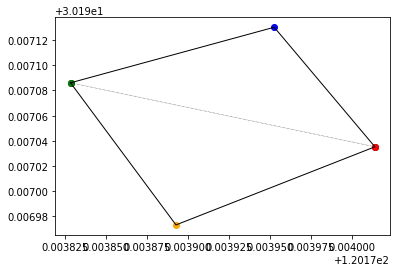

In [6]:
spg = Simple_polygon(nodes_rm_point)
a = spg.main(plot=True)


In [7]:
a

[array([120.1738282,  30.1970861]),
 array([120.1738926,  30.1969733]),
 array([120.1740141,  30.1970353]),
 array([120.1739526,  30.1971302])]